# Word Clouds from Covid-19 tweets

In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

plt.style.use('seaborn-poster')
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 6

### Explore table

In [2]:
tweets_df = pd.read_csv("covid19_tweets.csv", parse_dates=['user_created', 'date'])
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         179108 non-null  object        
 1   user_location     142337 non-null  object        
 2   user_description  168822 non-null  object        
 3   user_created      179108 non-null  datetime64[ns]
 4   user_followers    179108 non-null  int64         
 5   user_friends      179108 non-null  int64         
 6   user_favourites   179108 non-null  int64         
 7   user_verified     179108 non-null  bool          
 8   date              179108 non-null  datetime64[ns]
 9   text              179108 non-null  object        
 10  hashtags          127774 non-null  object        
 11  source            179031 non-null  object        
 12  is_retweet        179108 non-null  bool          
dtypes: bool(2), datetime64[ns](2), int64(3), object(6)
memory u

In [3]:
tweets_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


### Detect missing values

In [5]:
tweets_df.isna().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

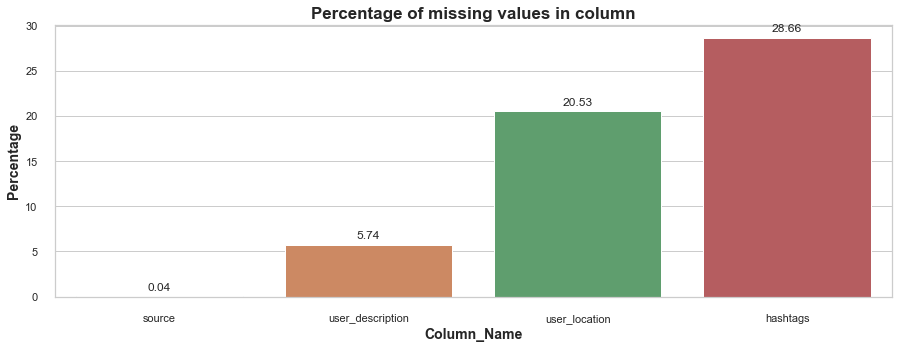

In [6]:
missing_values = pd.DataFrame()
missing_values['column'] = tweets_df.columns

missing_values['percent'] = [round(100* tweets_df[col].isnull().sum() / len(tweets_df), 2) for col in tweets_df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()

### Explore Data Distributions

In [7]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(x=df[feature], order = df[feature].value_counts().index[:20], color='forestgreen')
    else:
        g = sns.countplot(x=df[feature], color='forestgreen')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=12)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}%'.format(100*height/total), ha="center") 
    plt.show()

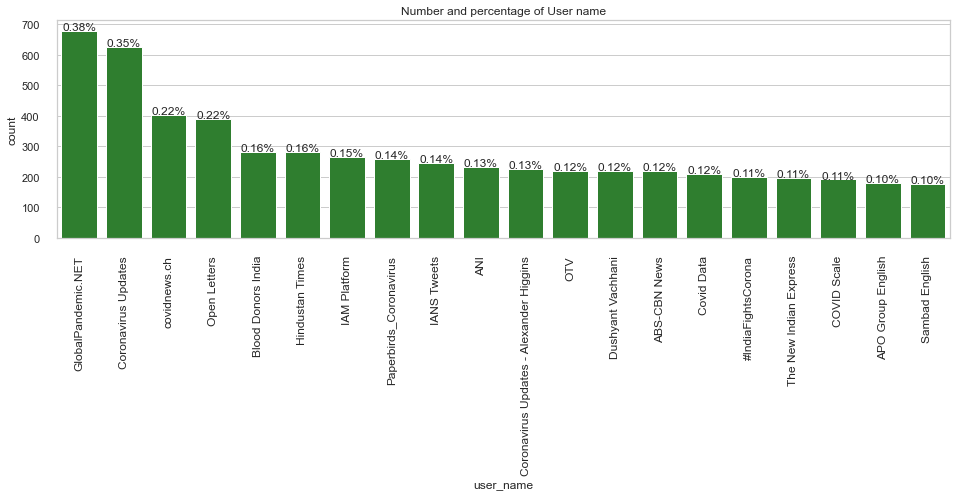

In [8]:
plot_count("user_name", "User name", tweets_df,4)

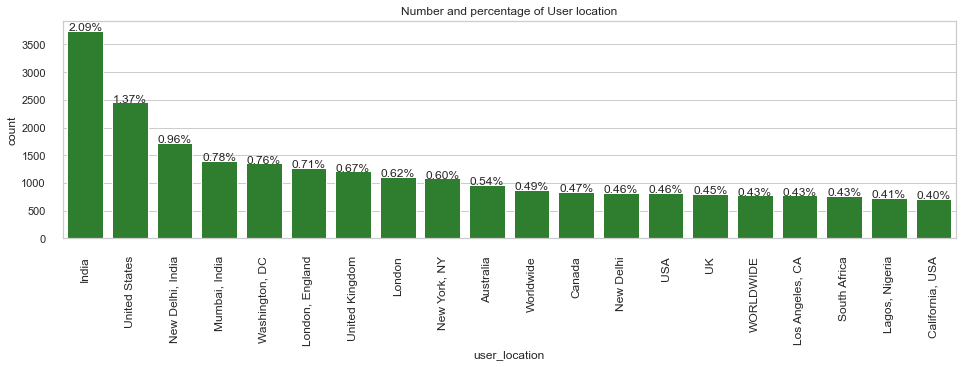

In [9]:
plot_count("user_location", "User location", tweets_df,4)

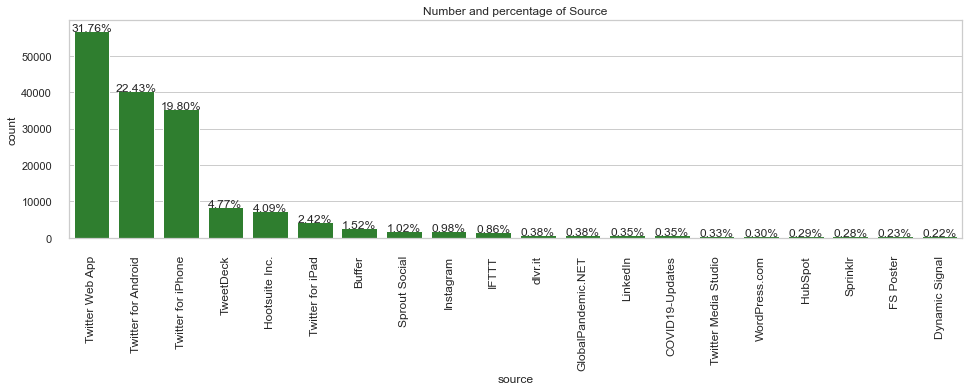

In [10]:
plot_count("source", "Source", tweets_df,4)

<function matplotlib.pyplot.show(close=None, block=None)>

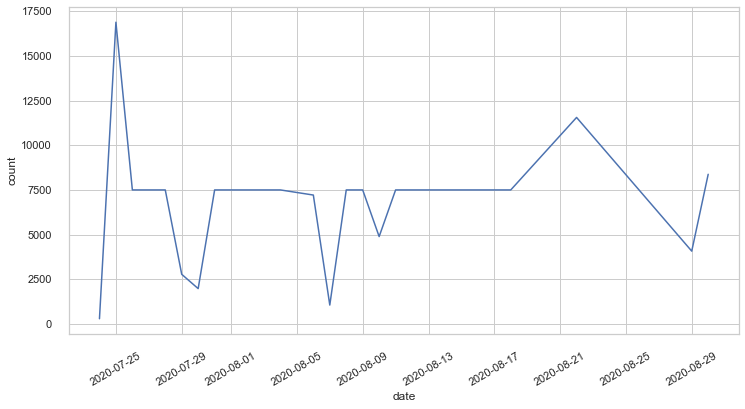

In [10]:
date_count = tweets_df['date'].dt.date.value_counts().reset_index()
date_count.columns = ['date', 'count']

sns.lineplot(x="date", y="count", data=date_count)
plt.xticks(rotation=30)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

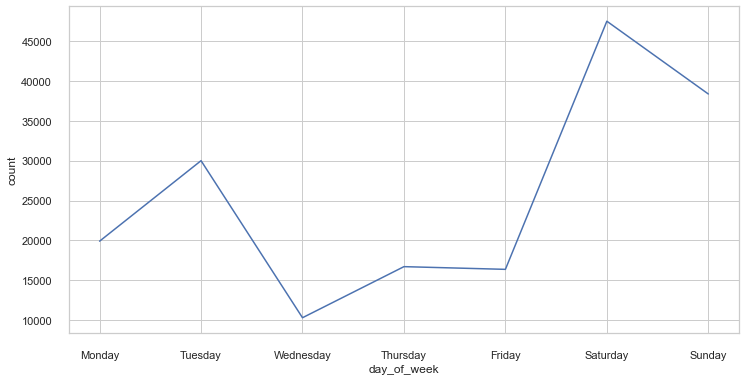

In [14]:
dow_count = tweets_df['date'].dt.day_name().value_counts()
dow_count = dow_count.loc[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]].reset_index()
dow_count.columns = ['day_of_week', 'count']

sns.lineplot(x="day_of_week", y="count", data=dow_count)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

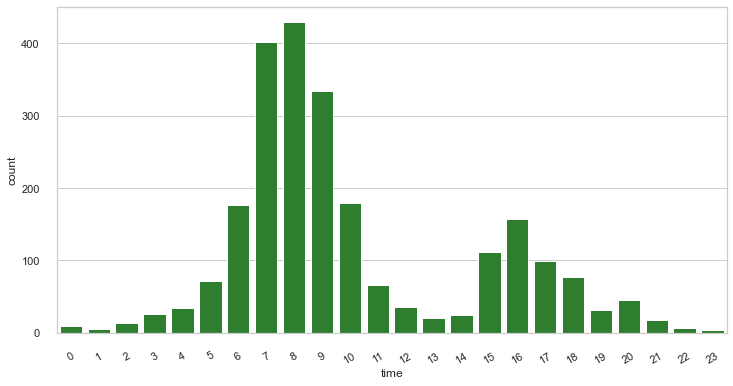

In [11]:
times = tweets_df['date'][tweets_df['user_location'].isin(["London, England", "London"])]
times = times.groupby([times.dt.hour]).count()
time_count = pd.DataFrame({'time': times.index,
                           'count': times.values})
sns.barplot(x="time", y="count", data=time_count, color='forestgreen')
plt.xticks(rotation=30)
plt.show

#### Which other information you think we should plot to better understand the data?  
  
  
  

### Visualize Word Clouds

In [11]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

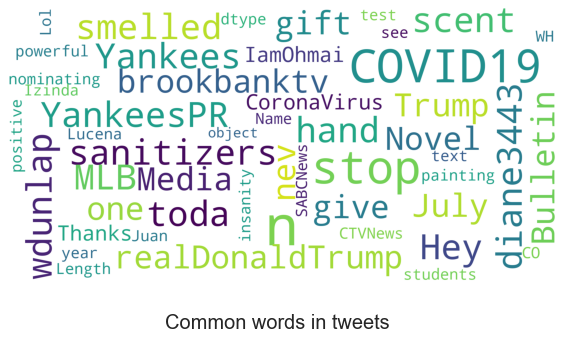

In [12]:
show_wordcloud(tweets_df['text'], title = 'Common words in tweets')

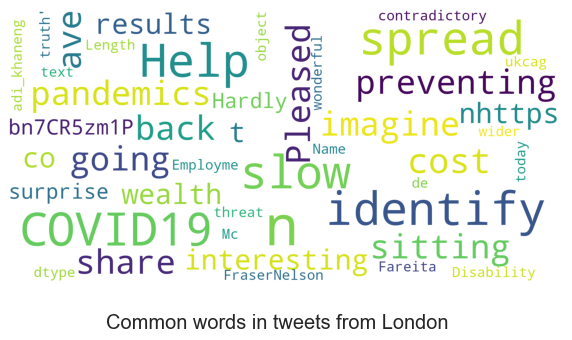

In [13]:
london_tweets = tweets_df['text'][tweets_df["user_location"].isin(["London, England", "London"])]
show_wordcloud(london_tweets, title = 'Common words in tweets from London')